In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('./한국어_단발성_대화_데이터셋.xlsx')[['Sentence','Emotion']]

In [3]:
df2 = pd.read_excel('./한국어_연속적_대화_데이터셋.xlsx')[['Unnamed: 0','Unnamed: 1','Unnamed: 2']]
df2.columns = df2.iloc[0]
df2 = df2.drop([0])
df2['dialog #'] = df2['dialog #'].fillna(0)
df2 = df2.dropna()./Data
df2 = df2[['발화','감정']]
df2.columns = ['Sentence',	'Emotion']

In [4]:
df4 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_4차.csv',encoding='CP949')

emo_loc = {key:val for val,key in enumerate(df4['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df4['1번 감정'].unique())}

emo_score = np.zeros((len(df4),7))
emo = df4['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df4 = pd.DataFrame(df4[['발화문']])
df4 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]
df4.columns = ['Sentence',	'Emotion']

In [5]:
df5 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_5차.csv',encoding='CP949')

emo_loc = {key:val for val,key in enumerate(df5['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df5['1번 감정'].unique())}

emo_score = np.zeros((len(df5),7))
emo = df5['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df5 = pd.DataFrame(df5[['발화문']])
df5 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]
df5.columns = ['Sentence',	'Emotion']

In [6]:
# 라벨 저장
emo_trans = {
    '분노':'Angry',
    '혐오':'Disgust',
    '중립':'Neutral',
    '놀람':'Surprise',
    '행복':'Happiness',
    '공포':'Fear',
    '슬픔':'Sadness'
}

In [7]:
# df2 오류 라벨 제거 
df2.Emotion.unique()

array(['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔', 'ㅈ중립', '분ㄴ', '중림', 'ㅍ',
       'ㄴ중립', '분', '줄'], dtype=object)

In [8]:
df2.shape

(55621, 2)

In [9]:
df2 = df2[[i in emo_trans.keys() for i in df2.Emotion]]

In [10]:
df2.shape

(55600, 2)

In [11]:
# 단발성, 연속성 라벨링 영문으로 변경
df1.Emotion = [emo_trans[i] for i in df1.Emotion]
df2.Emotion = [emo_trans[i] for i in df2.Emotion]

In [12]:
df1.head()

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,Fear
1,그냥 내 느낌일뿐겠지?,Fear
2,아직너무초기라서 그런거죠?,Fear
3,유치원버스 사고 낫다던데,Fear
4,근데 원래이런거맞나요,Fear


In [13]:
df2.head()

,Sentence,Emotion
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,Angry
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,Disgust
3,손님 왔어요.,Neutral
4,손님? 누구?,Neutral
5,몰라요. 팀장님 친구래요.,Neutral


# 1. 전체 통합

In [14]:
# 통합 진행
df = pd.concat([df1,df2,df4,df5])
df = df.sample(frac=1,random_state=42)

In [15]:
df.head()

,Sentence,Emotion
25045,내가 왜?,Angry
1875,"헉, 너무하잖아! 하지만 뭐, 괜찮아. 나도 내내 책 읽었으니까. 너는 패션 쪽에 ...",Neutral
15351,뭐?,Neutral
3168,네…!,Happiness
7752,아아아...,Neutral


In [16]:
# 데이터 저장
df.to_excel('./감정_분류_데이터셋(전체).xlsx')

In [17]:
df.shape

(118811, 2)

In [18]:
df.head(10)

,Sentence,Emotion
25045,내가 왜?,Angry
1875,"헉, 너무하잖아! 하지만 뭐, 괜찮아. 나도 내내 책 읽었으니까. 너는 패션 쪽에 ...",Neutral
15351,뭐?,Neutral
3168,네…!,Happiness
7752,아아아...,Neutral
33040,말씀 드렸잖아요. 우리 엄마 이혼 사건 마무리 될 때 까지요!!,Angry
26871,"대선 끝나면 세무조사,성폭력, 명예훼손으로 머리 아프겠네",Neutral
37284,"그럼요! 대어죠, 대어! 혼자 안될거 같아서 온 집안이 도와주기로 했으니까, 오늘은...",Angry
2203,병원을 갈라고 했어.,Neutral
28932,나 돈 줘.,Neutral


In [19]:
# 7개의 감정
df.Emotion.unique()

array(['Angry', 'Neutral', 'Happiness', 'Sadness', 'Fear', 'Surprise',
       'Disgust'], dtype=object)

In [20]:
# 약간의 데이터 불균형 존재
df.Emotion.value_counts()

Neutral      50673
Sadness      20393
Angry        15651
Surprise     10832
Fear          7224
Happiness     7198
Disgust       6840
Name: Emotion, dtype: int64

<AxesSubplot:>

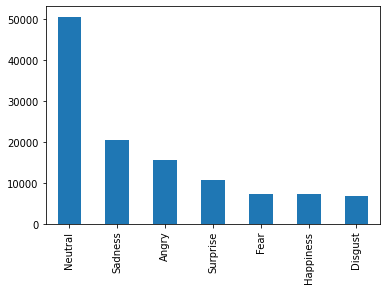

In [21]:
df.Emotion.value_counts().plot.bar()

In [22]:
# 각 감정에서 3개의 sample 추출 결과
pd.concat([df[df.Emotion == emotion_].sample(3, random_state = 42) for emotion_ in df.Emotion.unique()])

,Sentence,Emotion
13628,방 청소 문제로 매번 싸우게 되니까 너무 스트레스를 받아. 따로 사는 게 방법인 거...,Angry
8105,퇴근한지 얼마나 됐다고 회사에서 또 오라고 그러네.,Angry
16386,난 그래서 유치원 못 믿는다.,Angry
32972,야. 너 또. 당분간 만나지 말자고 그랬냐? 5년 동안. 내가 하루 이틀 겪었나....,Neutral
41519,저도 그렇게 알고 휴가증과 조퇴증을 끊어줬습니다만.. 결혼이라니..,Neutral
19960,하지만 이곳 공장에서 일하던 사람들은 일자리를 잃게 되기 때문에 반드시 좋다고만은 ...,Neutral
28071,"명절, 부모님 생신, 처갓집 어른 생신, 어버이날에 당연하다는 듯 집에 가자고 하는...",Happiness
32852,삼성톡 좋아~ 삼성톡 좋아~ 하고 유재석 등장할듯 ㅋㅋㅋㅋㅋ,Happiness
28666,삼고초려 끝에 오케이해준 에릭 진짜ㅜㅜㅜㅜㅜ 완전 좋다!!,Happiness
20589,혼자피시방에 시간떼우러가는게맞는걸까요??,Sadness


In [23]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 75 최소 1, 평균 6 의 분포를 보임.
pd.Series([len(i) for i in df['Sentence'].str.split(' ')]).describe()

count    118811.000000
mean          6.302640
std           4.542957
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          75.000000
dtype: float64

# 2. 부분 통합

연속성 제외

In [25]:
# 통합 진행
df = pd.concat([df1,df4,df5])
df = df.sample(frac=1,random_state=42)

In [26]:
# 데이터 저장
df.to_excel('./감정_분류_데이터셋(연속성_제외).xlsx')

4차, 5차 통합

In [27]:
df4 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_4차.csv',encoding='CP949')

emo_loc = {key:val for val,key in enumerate(df4['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df4['1번 감정'].unique())}

emo_score = np.zeros((len(df4),7))
emo = df4['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df4 = pd.DataFrame(df4[['wav_id','발화문']])
df4 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]
df4.columns = ['wav_id','Sentence',	'Emotion']

In [28]:
df5 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_5차.csv',encoding='CP949')

emo_loc = {key:val for val,key in enumerate(df5['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df5['1번 감정'].unique())}

emo_score = np.zeros((len(df5),7))
emo = df5['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df5 = pd.DataFrame(df5[['wav_id','발화문']])
df5 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]
df5.columns = ['wav_id','Sentence',	'Emotion']

In [29]:
df4.wav_id = '4차_wav/' + df4.wav_id
df5.wav_id = '5차_wav/' + df5.wav_id

In [30]:
# 통합 진행
df = pd.concat([df4,df5])
df = df.reset_index(drop=True)

In [31]:
# 데이터 저장
df.to_excel('./감정_분류를_위한_대화_음성_데이터셋_4-5.xlsx')

In [32]:
df

,wav_id,Sentence,Emotion
0,4차_wav/5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",Neutral
1,4차_wav/5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,Neutral
2,4차_wav/5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,Angry
3,4차_wav/5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,Sadness
4,4차_wav/5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness
...,...,...,...
24612,5차_wav/5f05ffd5b140144dfcff01c7,너의 말 대로 약속 장소를 옮겨 보는 것도 좋은 방법 같아. 나는 취소할 생각만 했...,Neutral
24613,5차_wav/5ec53bf82880d70f28611de0,산책하는 게 나을 것 같아. 이제부터 산책 좀 해볼게.,Neutral
24614,5차_wav/5f0b2b5ab140144dfcff2759,너의 말을 듣고보니까 약속장소를 옮겨보는 것도 좋은 방법 같아.,Neutral
24615,5차_wav/5f0b2b75b140144dfcff275a,오늘 친구한테 전화해서 안좋은 상황이니까 약속을 미룰지 약속 장소를 변경할지 상의해...,Neutral


# 3. 저장 파일 확인

In [29]:
df = pd.read_excel('./감정_분류_데이터셋(연속성_제외).xlsx',index_col=0)

In [30]:
df.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

In [28]:
# 데이터 저장
df.to_excel('./감정_분류_데이터셋(연속성_제외).xlsx')